In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Deep Learning

In [3]:
#pip install tensorflow 

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth-2.3.3-py2.py3-none-any.w

In [4]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist


Text(0.5, 1.0, '0')

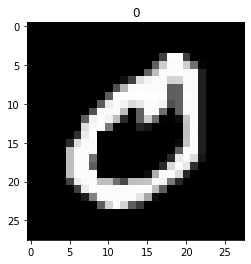

In [5]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [6]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [8]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [9]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [10]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [11]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [12]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4636 - accuracy: 0.8581 - val_loss: 0.1696 - val_accuracy: 0.9473
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2323 - accuracy: 0.9331 - val_loss: 0.1247 - val_accuracy: 0.9604
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1904 - accuracy: 0.9449 - val_loss: 0.1090 - val_accuracy: 0.9667
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1678 - accuracy: 0.9513 - val_loss: 0.1144 - val_accuracy: 0.9664
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1516 - accuracy: 0.9557 - val_loss: 0.1046 - val_accuracy: 0.9697
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1426 - accuracy: 0.9583 - val_loss: 0.1012 - val_accuracy: 0.9691
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1311 - accuracy: 0.9611 - val_loss: 0.0920 - val_accura

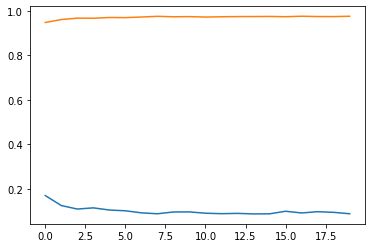

In [13]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [14]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

array([[9.16163767e-09, 6.97538804e-10, 2.47353512e-07, ...,
        9.99926329e-01, 5.64505562e-08, 6.86074272e-05],
       [5.64331293e-09, 4.19145323e-08, 9.99976635e-01, ...,
        5.52631363e-09, 2.10074838e-08, 7.43636760e-13],
       [3.83047656e-11, 9.99992490e-01, 3.03184358e-08, ...,
        4.83674000e-07, 1.42981071e-06, 6.50731857e-10],
       ...,
       [1.90272260e-11, 1.11174285e-10, 4.02304856e-08, ...,
        3.94479933e-08, 4.13360723e-09, 1.49622991e-07],
       [6.88181608e-14, 1.36982697e-13, 6.20219891e-17, ...,
        4.16822288e-15, 8.11132994e-10, 5.23106298e-12],
       [5.15980259e-10, 1.73799946e-14, 1.39415618e-10, ...,
        6.63525906e-17, 1.16938889e-10, 9.75918645e-16]], dtype=float32)

In [15]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 970,    0,    0,    0,    0,    2,    3,    1,    2,    2],
       [   0, 1122,    2,    3,    0,    0,    2,    2,    4,    0],
       [   4,    1, 1009,    4,    3,    0,    2,    4,    5,    0],
       [   0,    0,    7,  983,    0,    4,    0,    4,    4,    8],
       [   1,    0,    2,    0,  961,    0,    5,    1,    1,   11],
       [   1,    0,    0,   16,    1,  860,    8,    1,    3,    2],
       [   3,    4,    0,    0,    5,    5,  938,    0,    3,    0],
       [   2,    1,    8,    3,    1,    0,    0, 1005,    2,    6],
       [   3,    1,    3,    9,    5,    4,    3,    5,  938,    3],
       [   1,    2,    0,    7,   15,    5,    1,   10,    2,  966]],
      dtype=int64)

In [16]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]